<a href="https://colab.research.google.com/github/Sujjet6776/signal-system/blob/main/SP_2_CubicInterpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt; import numpy as np; plt.rcParams['figure.figsize']= [10,5]

#Cubic Interpolation

 This is a continuation of the discussion on piecewise cubic interpolation. Thanks to many students who interacted in and outside the class.

 Clearly, using cubic polynomials between successive samples can help us get a more smooth interpolated waveform than linear interpolation. Here *smooth* is in the sense of being a differentiable analog function in the interval of interest $t \in (t_1,t_n)$ (open, though we can close it as well). Let us consider equi-spaced samples, i.e., $|t_i - t_{i-1}|=T$, for some $T > 0$. You are also free to pad zero values to take care of the edge effects. We will show  that *piecewise cubics* are much more simpler to compute than Lagrange polynomials, albeit less smooth.


---

Let us interpolate between $t_i \leq t \leq t_{i+1}$, with $t_{i+1}= t_i + T$. We are going to label
\begin{align}
v_0 &:= x(t_i) \\
v_1 &:= x(t_{i+1}) .
\end{align}
This is just for notational simplicity. We will construct a polynomial $P_i(t)$ such that $P_i(t_i) = v_0$ and $P_i(t_{i+1}) = v_1$. A cubic polynomial can ensure that the resulting curve is differentiable for $t \in [t_i, t_{i+1}]$. Notice that the use of the closed interval may necessitate some zero padding at the edges. Since the derivative of the waveform at $t=t_i$ may depend on values before $t_i$, let us also denote
the previous and future samples conveniently as
\begin{align}
v_{-1} &:= x(t_{i-1}) \\
v_2 &:= x(t_{i+2}) .
\end{align}
Below we list two simplifications to figure out an appropriate $P_i(t)$.
## Idea 1: Translation
Suppose  we  take $t_i=0$ and find an appropriate cubic polynomial $\hat Q(t)$ between $0\leq t \leq T$ with $\hat Q(0) = v_0$ and $\hat Q(T) = v_1$, then we can take $P_i(t) = \hat Q(t-t_i)$ as the required interpolating waveform for the original question, where $t_i$ is starting point we were interested in the original problem.

##Idea 2: Scaling the argument.
After taking $t_i=0$, suppose we assume $T=1$, and find an appropriate cubic polynomial $Q(t)$ such that $Q(0) = v_0$ and $Q(1) = v_1$. Then we can take $P_i(t) = Q(\frac{t-t_i}T)$ for the original problem, with any finite positive $T$.

---
In short, the ideas of translation and argument-scaling are very convenient, to simplify notation and ease of programming. Usually the argument is time, then we call these operations *time-translation* and *time-scaling*, however they apply for more general arguments. We will find an appropriate $Q(t)$ for each interval of interest, and then do the above manipulations to obtain $P_i(t)$. To proceed further, let us explain how we maintain the differentiability of the piecewise polynomial.






##Differentiability:
 Note that any cubic polynomial $P_i(t)$  is many times differentiable  in the interval $t_i < t < t_{i+1}$. It is only the edges of the interval where we have to ensure a unique derivative, i.e. $P_{i-1}(t)$ and $P_{i}(t)$ should have the same slope at $t=t_i$. Once this is satisfied for all $t_i$ of our interest, then we are happy. While we are free to choose the value of the unique slope we demand at each $t=t_i$, the elegant choice mentioned below gives consistent answers, and is employed widely in practice.
 $$P_i^{\prime}(t_{i}) = \frac{x(t_{i+1}) -  x(t_i)}{2T} = P_{i-1}^{\prime}(t_{i}).
 $$
 Thus we get differentiability at every point within the entire interval of interest. Let us now construct the waveform  for our classroom example, which considered the following set of samples (see figure below). We take $T=2$ as the sample spacing, to illustrate the argument scaling effects.


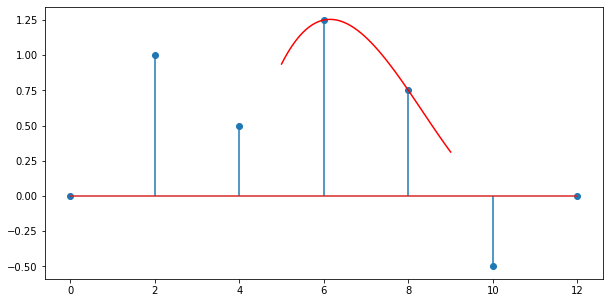

In [ ]:
#@title Piecewise Cubic Construction
T = 2;                                        # time interval taken as 2 seconds.
Dy = np.array([0, 1,0.5,1.25,0.75,-0.5, 0]);  # Data points, padded with zeros.
Dx = 2*np.arange(0,len(Dy));                  # time instant t_i = i T, i = 0,1,2,..
plt.stem(Dx, Dy, use_line_collection=True)    # visualize the data

#Let us constuct cubic in the interval [6,8], i.e interval between Dx[3] and Dx[4]. To get this, we need samples Dy[2], Dy[3], Dy[4] and Dy[5].

M = np.array([[-0.5, 1.5, -1.5, 0.5], [1,-2.5,2,-0.5],[-0.5,0,0.5,0],[0,1,0,0]]); # calculations for  a,b,c,d in matrix form.
pcoeff = np.matmul(M,Dy[2:6].T)   # compute the coefficients for Q(t).

t = np.linspace(5,9,50);          # to generate a continuous looking plot in an interval around [6,8], we plot from 5 to 9.

st = t/2.0                        # SCALE the time to obtain Q(t/T) with T=2.
stt = st - 3.0;                   # TRANSLATE (t-t_i)/T = t/T - t_i/T to the correct starting point, i.e. abscissa 6.
plt.plot(t, pcoeff[0]*stt*stt*stt+pcoeff[1]*stt*stt +pcoeff[2]*stt + pcoeff[3],'r');  #can also use np.power(t,m) for t^m, see plot below.

Notice the last 3 lines above, which does the time-scaling and translation, followed by plotting the actual polynomial.

In the above plot, the polynomial $P_3(t)$ is valid for the interval $6 \leq t \leq 8$, and not outside. So the curve should be curtailed to this interval. To give a *better* picture, let us also plot $P_2(t)$ on the same figure. We show some portions of these polynomial outside the actual range where they are interpolating, just to emphasize that we do not care about each polynomial value outside its valid range. This is why we call it *piece-wise* cubic. The overall function may not be a polynomial at all, let alone a cubic.

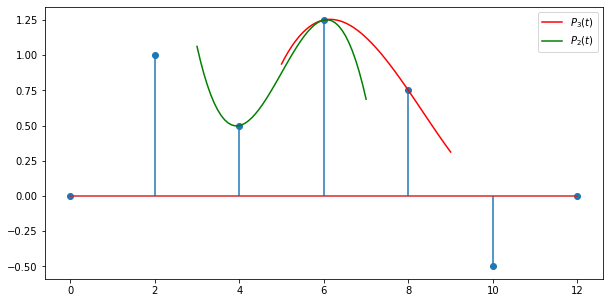

In [ ]:
#@title Viewing Adjacent Cubics
plt.stem(Dx, Dy, use_line_collection=True)  # previous plot
plt.plot(t, pcoeff[0]*stt*stt*stt+pcoeff[1]*stt*stt +pcoeff[2]*stt + pcoeff[3],'r', label='$P_3(t)$') #previous plot

#Additional Plot
pcoeffn = np.matmul(M,Dy[1:5].T)  #  computes the coefficients for the required Q(t).
tn      = np.linspace(3,7,50);    # to generate a continuous looking plot in an interval around [4,6]
stn     = tn/2.0                  # scaled time for Q(t/T) with T=2.
sttn    = stn - 2.0;              # (t-t_i)/T = t/T - t_i/T, translated to the starting point, i.e. abscissa 6.
plt.plot(tn, pcoeffn[0]*sttn*sttn*sttn+pcoeffn[1]*sttn*sttn +pcoeffn[2]*sttn + pcoeffn[3],'g', label='$P_2(t)$')
plt.legend(ncol=1)

Notice that both $P_2(t)$ and $P_3(t)$ have the same slope at $t=6$. So the interpolating waveform, taken in a piecewise manner as $P_2(t)$ in $4 \leq t \leq 6$ and $P_3(t)$ for $6\leq t \leq 8$, will agree not only on the value it takes at $t=6$, but also has a unique slope defined at each $t$ in $4 < t < 8$. Remember that we are not as such superposing the polynomials, we only pick them piecewise for non-overlapping intervals.

#Homework-2.1:
  Complete the cubic interpolation for the samples given above, and make a plot of just the interpolating function (i.e. remove the extra ribbons). However, be careful, you may need to add more zeros to get the full picture. You can email your answer in png format. However, all  answers for Homework-2.x should reach as a single email. So wait till I announce all Homework-2 series questions (in class).

# A More Practical Example

This takes into account a question raised in the class about the practical suitability of linear interpolation, and also other such interpolators.

---
**Question**: A set of samples $x[n] = \sin(2 \pi 1000 n T_s)$ are given to you for $n = 0,1,2,\ldots$. Suppose $T_s = \frac 1{8 \times 10^3}$. How will you produce a 1 kHz  audible sine-wave output using these samples in your computer, which is assumed to have an audio card running at $f_{clk} = 48 \times 10^3$ Hz.

#Answer:
 Let us first have a detailed look at these samples. Which possible continuous time waveform can we obtain by interpolating the given sequence of values. A natural guess is that the samples might have come from the function $x(t) = \sin(2 \pi 1000 t)$, which is an 1 kHz audible sine wave. Notice here that $t$ is measured in seconds. Of course there are many other possible choices for $x(t)$, for example by linear interpolation or cubic interpolation of the samples. Let us plot the samples and see.

<StemContainer object of 3 artists>

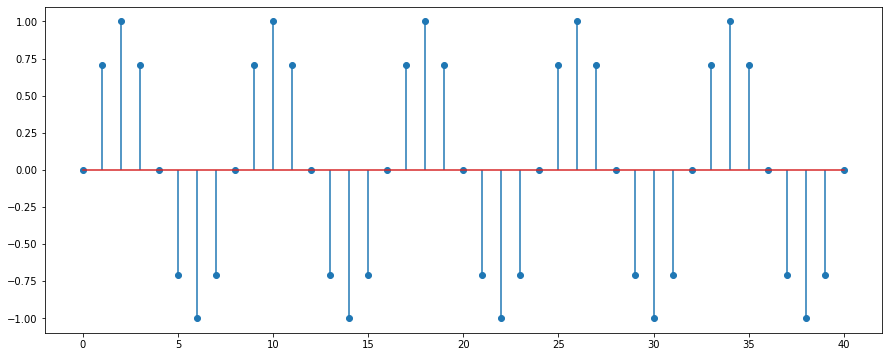

In [ ]:
plt.rcParams['figure.figsize']= [15,6]

N = 41 # number of samples
pt = np.arange(0,N);
plt.stem(pt, np.sin(2*np.pi*1000*pt/(8000)), use_line_collection=True)

Linear Interpolator Output Waveform for the above question is shown below. Notice the kinks in the curve, leading to a visible lack of smoothness.
 Notice that the wave does one cyclic excursion in $8$ samples. As we mentioned, the usual plots connect successive samples with a line, and this gives a visualization/illusion of an analog waveform, see below.


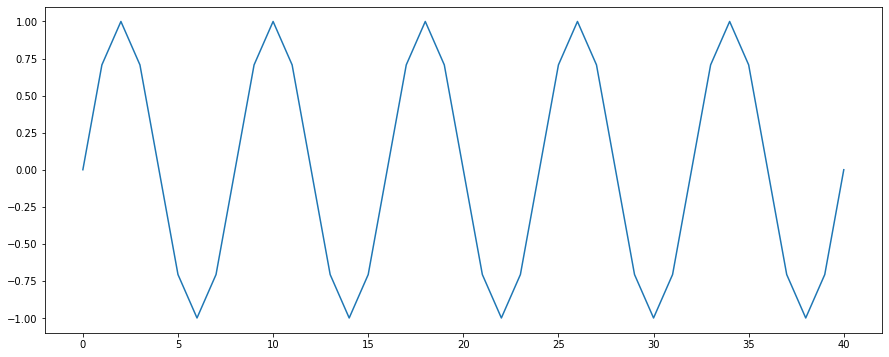

In [ ]:
plt.plot(pt, np.sin(2*np.pi*1000*pt/(8000)))

## Resampling
We can wake up from the illusion and ask how well the underlying discrete-time waveform play out on a audio device? Note the audio device is reading $48\times 10^3$ samples a second, that is why it has a rating of $48$kHz. So $48$ samples are read in each millisecond.
<br>

If the cycles have to *span* $1$ millisecond, we need $48$ samples per cycle, whereas the input only has $8$ samples per cycle. So we need to convert the $8$ samples to $48$, i.e. $6$ times more samples. This factor of additional samples is known as the **interpolation factor**, and idea of obtaining a different set of samples from the given one is known as **resampling**. While the plot below makes you visualize resampling by a factor of $6$ (i.e. from 8 to 48) using a linear intepolator, these things are best illustrated in at tool called GNURADIO.


<StemContainer object of 3 artists>

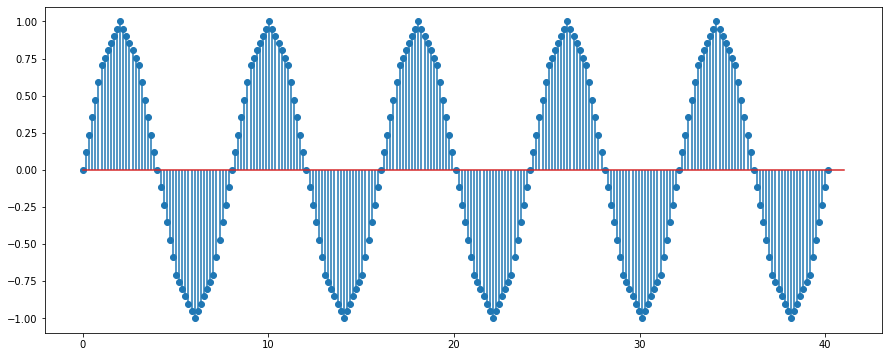

In [ ]:
xt = np.sin(2*np.pi*1000*pt/(8000))
#Create more points.
IA = np.zeros((6,N))  #array to store 6 times interpolated values.
IA[0,:] = xt          # first row with the given values.
for k in range(1,6):
  for i in range(0,N-1):
    IA[k,i] = xt[i]*(1-k/6) + xt[i+1]*(k/6)
  IA[k,N-1] = np.NaN; # to avoid edge effects, last few values not plotted.
IB = IA.T.reshape(6*N,1);
#plt.plot(IB)
plt.stem(np.linspace(0,41, 6*N), IB, use_line_collection=True)


#The Linearity of Piecewise Cubics

 You may think '*of course linear is not cubic*', how can then *cubic be linear*. To your dismay, the statement of piecewise cubics being linear is not a mirage, but true in some *intertial reference frames*. This confusion is intentionally created here, that you follow the text below with interest.

 Suppose we wish to cubic (piecewise) interpolate the samples $x_k, k\geq 0$. Recall that 4 sample values are required to find the interpolation between $[kT, (k+1)T]$, viz. $(x_{k-1}, x_k, x_{k+1}, x_{k+2})$. We then do the following.


1.   Compute
\begin{align}
\begin{bmatrix} a_1 \\ b_1 \\ c_1 \\ d_1 \end{bmatrix}
=
\begin{bmatrix}
-0.5 & 1.5 & -1.5 & 0.5 \\
1 & -2.5 & 2 & -0.5 \\
-0.5 & 0 & 0.5 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
x_{k-1} \\ x_{k} \\ x_{k+1} \\ x_{k+2}
\end{bmatrix} \tag{C}
\end{align}
2.   Compute the polynomial
$$
P_k(t) = a_1 \left(\frac{t-kT}{T}\right)^3 + b_1 \left(\frac{t-kT}{T}\right)^2 + c_1 \left(\frac{t-kT}{T}\right) + d_1,
$$
valid in the range $kT \leq t \leq (k+1)T$.

---

Similary for the input sequence $y_k, k \geq 0$ we can find the polynomial
\begin{align}
Q_k(t) = a_2 \left(\frac{t-kT}{T}\right)^3 + b_2 \left(\frac{t-kT}{T}\right)^2 + c_2 \left(\frac{t-kT}{T}\right) + d_2,
\end{align}
where $(a_2, b_2, c_2, d_2)$ are obtained replacing the variable $x$ by $y$ in Equation-(C) above.

<br>

What happens when the input sequence is $(x_k+y_k), k \geq 0$, do we need to compute all the polynomials again? Let us denote the coefficients in Equation-(C) as
$[a_1, b_1, c_1, d_1]^T := \bar p_k$, and $[a_2, b_2, c_2, d_2]^T := \bar q_k$.

 Then $\bar p_k = A \hat x_k$ , where $\hat x$ represents $[x_{k-1}, x_k, x_{k+1}, x_{k+2}]^T$, $A$ is the matrix in Equation-(C). Similarly $\bar q_k = A \hat y_k$. Clearly for the input sequence with $x_k + y_k$ the coefficients are
 $$
 \bar r_k = A (\hat x_k + \hat y_k) = \bar p_k + \bar q_k.
 $$
 So no need to compute the coefficients again, we can add the individual coefficients already computed. When the coefficients are superposed, the resulting polynomials are also superposed.




#A More Impulsive Approach:
 We do many impulsive things, and the learned may say not to act up on those impulses. The entire *big-bang* appears to an impulse, but indeed a bang-for-the-buck. The *signal processing impulses* also deal with some singularity, but it only augments our predictive power. For us each time sample of a discrete-time signal signifies a impulse associated with that time instant. Therefore, a discrete-time signal becomes a collection of impulses, and our strategy is to deal with each of them separately till some convenient instant where we will re-assemble the required calculations.

Suppose we have equispaced samples of a signal, given by the vector $\bar x = x_1, \ldots, x_n$. Suppose $P_x(t)$ is the resulting piecewise cubic interpolation of these values. Let $\bar y = y_1, \ldots, y_n$ are another set of samples for the same sampling instants, and let $Py(t)$ be their piecewise cubic interpolation. Observe that $P_x(t) + P_y(t)$ gives the piecewise cubic interpolation of $\bar x + \bar y$. In particular, the sum is a cubic between any pair of successive samples.

Using the above approach, the output of interpolating a set of samples spaced  $T$ apart is nothing but the superposition of the piecewise cubic interpolation of the individual samples alone, by considering all other samples than the one under consideration as zero. Let a single non-zero sample at $t=0$ produce a piecewise cubic output $h(t)$.

How do we calculate this? We can take one sample at $t=0$ with value $x(0)=1$, and $x(nT)=0, n \neq 0$. The output will cover the range $-2\leq t \leq 2$. The output is zero outside this interval, as all the samples we consider then are zeros, resulting in zero polynomials for $|t|> 2$.   The output will have the following shape.



---


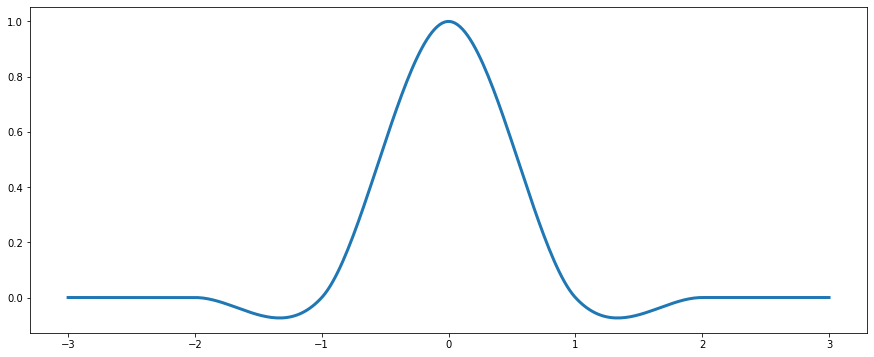

In [ ]:
@title Cubic Impulse Response
t = np.linspace(-3,3,300)                         # x axis to look continuous for -3 < t < 3
c_out = (1 - 2.5*t*t + 1.5*t*t*t)*(0<=t)*(t<=1)   # polynomial in (0,1).
c_out+= (1 - 2.5*t*t - 1.5*t*t*t)*(-1<=t)*(t<0)   # polynomial in (-1,0)
c_out+= 0 + (0.5*(t+1) + (t+1)*(t+1) + 0.5*(t+1)*(t+1)*(t+1))*(-2 <= t)*(t < -1)  # polynomial for (-2,-1)
c_out+= (-0.5*(t-1) + (t-1)*(t-1) -0.5*(t-1)*(t-1)*(t-1))*(t>1)*(t<=2)            # polynomial for (1,2)

plt.plot(t,c_out, linewidth=3)                    # plotting the cubic response to a unit sample at t=0.
plt.ylabel('$h(t)$')


If there are two non-zero samples, then the cubic response to a unit sample at the time instant $t=0$ is scaled by the given amplitude and shifted in time, for each of the two samples separately.  The difference from the approach used at the start of our discussion is that we are not computing separate polynomials for non-overlapping regions of time,
rather our computed piece-wise polynomials (for different samples) may overlap and superpose.
Let us also discuss how cubic interpolation can be achieved in the first example of this sheet using the idea of superposition.


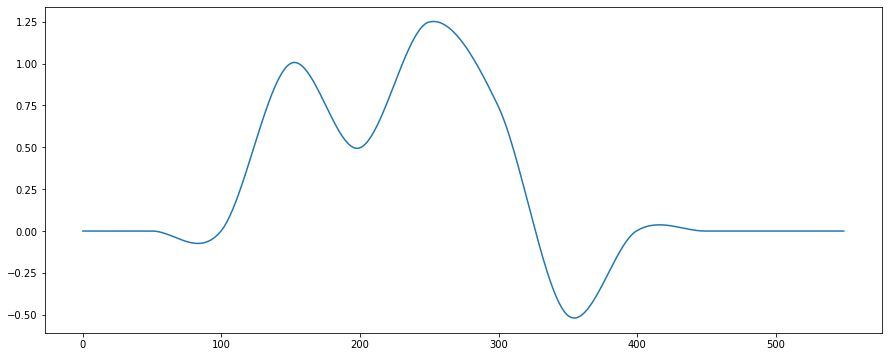

In [ ]:
L = len(c_out)
a_wave = np.zeros(250+L)                # output length for all the samples together.
for i in range(0,6):
  a_wave[50*i:50*i+L] += Dy[i+1]*c_out  # Superpose the waveforms. Note that there are 50 samples per division in the above picture of c_out.

plt.plot(a_wave)                        # let us plot the resulting waveform.

#Big Picture

The larger picture is that of **replacement** of each sample by the appropriate cubic response and then the **superposition** thereof. The output waveform of the interpolator for equi-spaced samples can be written as
$$
y(t) = \sum_{i \in \mathcal I} x(t_i) h(t-t_i),
$$
where $h(t)$ is the output of a single impulse at time $t=0$, and $t_i = iT$.
The first positive instant at which $h(t)$ hits zero should be $t=T$. Not surprisingly, $h(t)$ here is known as the **impulse response** of the piecewise cubic interpolator.


The operation represented as a summation is a very important operation in signal processing, and our further discussions will dive into the details of this. Let us do an interesting homework now.

#Homework-2.2:

  Take your roll number and replace any alphabet by the number $-3$, and replace any zero by the number $-5$, to obtain a sequence $(x_1, x_2, \ldots, x_n)$, where $x_i$ is the $i$-th digit of your roll number. For these samples, construct the (as we explained) piecewise cubic interpolated waveform $y(t)$, and email the plot in png format.

#Homework-2.3:

This is a computational exercise, you are free to use any program to figure out the answer (like Python, java, C++, matlab, octave), but I recommend using Python itself. The file contains data from the 2022 edition. New data will be put soon, by that time you can try out with some file from below.

---
You are required to download a file bearing your roll number from

https://drive.google.com/drive/folders/1o-qBYtIX67-xBYuTxffxthaQSN8CW6kI?usp=sharing

Please download only the correct file, this may require iitb ldap login to google (has more general permissions). What is in the file? Look inside, it is a data file containing an array of values. If you plot and see the `analog' form, it looks like a piecewise polynomial. This is true, it is indeed a segment from the piecewise cubic interpolation of a sequence of values. Of course it is tedious to put down the values of an analog waveform as such, so I have given you samples at a spacing much smaller than the original sample spacing $T$ used in the interpolation. Let $x_1, x_2, \ldots,$  denote the actual samples that were interpolated before we cut this segment out.

---
Your Task: **Find the first $10$ actual samples in the segment given to you.** Your answer can be expressed as a row vector with 1 digit decimal approximation for any fractional number. Please mark the values on a plot which has the original interpolated waveform as well.  Your roll number should be visible in the png figure that you email to srbpteach@gmail.com

---

Rules:  The exercise may appear silly for some, while others may need more time. But it is really to help you think, a purpose defeated while asking a friend for help. If you need a hint after spending enough time, better to talk to me directly.  